# DataSet Presentation (MoTMo model)
Recall the following variable names:
- `elDem` --> Electricity Demand
- `nStat` --> Number electring charging stations
There are emissions (`emissions_X`) and developments (`stock_X`) of each type of mobility:
- `C`: combustion car
- `E`: electric car
- `N`: non-motorized.
- `P`: public transport.
- `S`: shared mobility.


## First Scenario

Let's assume the scenario where there is a subsidy in electric vehicle (`SE`), the gas prices rises (`CO`) and there is public transport subsidy (`SP`). Then the first thing is that we should loog for a file named `timeSeries_CH0SP1SE1WE0BP0RE0CO1DI0WO0CS0.csv`.

In [3]:
import numpy as np
import pandas as pd

import datetime as dt
import time

import os
from os import listdir
from os.path import isfile,join
import matplotlib.pyplot as plt

In [2]:
PATH = '/home/moni/Documents/motmo/timeSeries_files/'

In [4]:
sc1_df = pd.read_csv(PATH + 'timeSeries_CH0SP1SE1WE0BP0RE0CO1DI0WO0CS0.csv')

In [5]:
regions_names = ["Schleswig-Holstein","Nordrhein-Westfalen","Baden-Wurttemberg","Hessen","Bremen","Thuringen",
"Hamburg","Rheinland-Pfalz","Saarland","Bayern","Berlin","Sachsen-Anhalt","Sachsen","Mecklenburg-Vorpommern",
"Brandenburg","Niedersachsen"]

### Idea for analyzing electric demand
Create a new dataframe such that its columns are the different regions and the rows are the timesteps.

In [6]:
test_df = sc1_df[(sc1_df['varName']=="elDem")].drop("hhID", axis=1)
test_df
#test_df.pivot(index='step', columns='reID', values='value')

,step,reID,varName,value
0,0,942,elDem,2.181393e+05
1,1,942,elDem,2.181393e+05
2,2,942,elDem,2.181393e+05
3,3,942,elDem,2.181393e+05
4,4,942,elDem,2.181393e+05
...,...,...,...,...
5606,176,6321,elDem,5.043884e+07
5607,177,6321,elDem,5.249344e+07
5608,178,6321,elDem,5.394722e+07
5609,179,6321,elDem,5.543543e+07


In [8]:
regions_ids = test_df.columns.values.tolist()
r_n = dict(zip(regions_ids,regions_names))
test_df = test_df.rename(columns=r_n)

In [10]:
regions_ids

['step', 'reID', 'varName', 'value']

In [7]:
dates_list = pd.date_range(start = "2005-01-01",periods = 181,freq="2M").strftime("%b-%Y").tolist()
ind_name = dict(zip(list(range(0,181)),dates_list))
test_df = test_df.rename(index=ind_name)
test_df=test_df.loc["Jan-2018":]

### Cleaning dataframe
Here we put the dates to the stepsizes and names to the region codes, so that it is easier to visualize.

In [7]:
def df_clean(df):
    df = df.pivot(index='step', columns="reID", values='value')
    regions_ids = df.columns.values.tolist()
    print(regions_ids)
    r_n = dict(zip(regions_ids,regions_names))
    df = df.rename(columns=r_n)
    dates_list = pd.date_range(start = "2005-01-01",periods = 181,freq="2M").strftime("%b-%Y").tolist()
    ind_name = dict(zip(list(range(0,181)),dates_list))
    df = df.rename(index=ind_name)
    df = df.loc["Jan-2018":]
    return df
test_df = df_clean(test_df)

[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]


<Figure size 432x288 with 0 Axes>

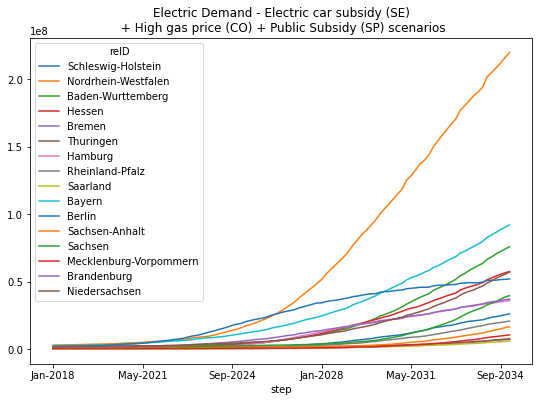

In [26]:
plt.figure()
fig = test_df.plot(figsize=(9,6), title = "Electric Demand - Electric car subsidy (SE)\n + High gas price (CO) + Public Subsidy (SP) scenarios")
fig.axes.title.set_size(12)

## Tracking Emissions

In [10]:
ecom_df = sc1_df[(sc1_df['varName']=="emissions_C")].drop("varName",axis=1)
eel_df = sc1_df[(sc1_df['varName']=="emissions_E")].drop("varName",axis=1)
scom_df = sc1_df[(sc1_df['varName']=="stock_C")].drop("varName",axis=1)
sel_df = sc1_df[(sc1_df['varName']=="stock_E")].drop("varName",axis=1)
#test_df.pivot(index='step', columns='reID', values='value')
#hhID_list = ecom_df["hhID"].unique()
#fig, axes = plt.subplots(nrows=len(hhID_list), ncols=2, sharex=True, figsize=(5,2)) 


#t.join(t2[0],lsuffix='_caller', rsuffix='_other')
eel_df


,step,reID,hhID,value
165253,0,942,1.0,0.000000
165254,1,942,1.0,0.000000
165255,2,942,1.0,0.000000
165256,3,942,1.0,0.000000
165257,4,942,1.0,0.000000
...,...,...,...,...
323804,176,6321,11.0,331967.018597
323805,177,6321,11.0,335192.273566
323806,178,6321,11.0,359287.360290
323807,179,6321,11.0,380945.654219


## Transforming a dataframe
The following function takes a dataframe, filters it and returns the average emission or stock development per household type.

In [11]:
def trans_df(df):
    dfs = []

    for i in range(0,12):
        t = df_clean(df.loc[df['hhID']==i])
        av = "hhType_"+str(i)
        t[av]=t.mean(axis=1)
        dfs.append(t)
    df2 = dfs[0].index.copy().to_frame()
    for i in range(1,11):
        name = "hhType_"+str(i)
        df2[name] = dfs[i].iloc[: , -1]
    df2 = df2.drop("step", axis=1)
    return df2    


[]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1

<Figure size 432x288 with 0 Axes>

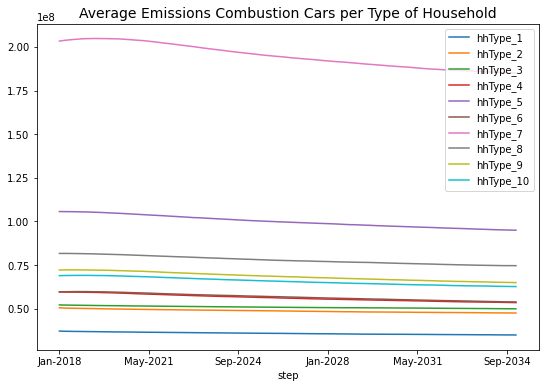

In [33]:
plt.figure()
tDf=trans_df(ecom_df)
fig = tDf.plot(figsize=(9,6), title = "Average Emissions Combustion Cars per Type of Household")
fig.axes.title.set_size(14)

### Emissions electric cars

[]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1

<Figure size 432x288 with 0 Axes>

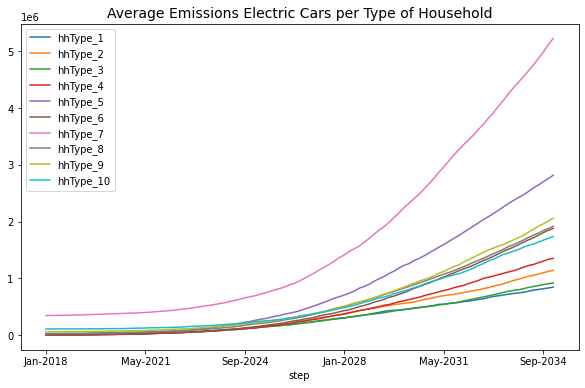

In [32]:
plt.figure()
tDf=trans_df(eel_df)
fig = tDf.plot(figsize=(10,6), title = "Average Emissions Electric Cars per Type of Household")
fig.axes.title.set_size(14)

## Stcok Deevelopment Combustion Cars

[]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1

<Figure size 432x288 with 0 Axes>

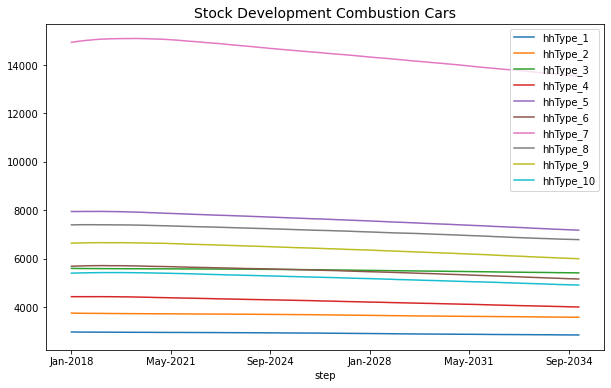

In [34]:
plt.figure()
tDf=trans_df(scom_df)
fig = tDf.plot(figsize=(10,6), title = "Stock Development Combustion Cars")
fig.axes.title.set_size(14)

[]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
[942, 1515, 1516, 1517, 1518, 1519, 1

<Figure size 432x288 with 0 Axes>

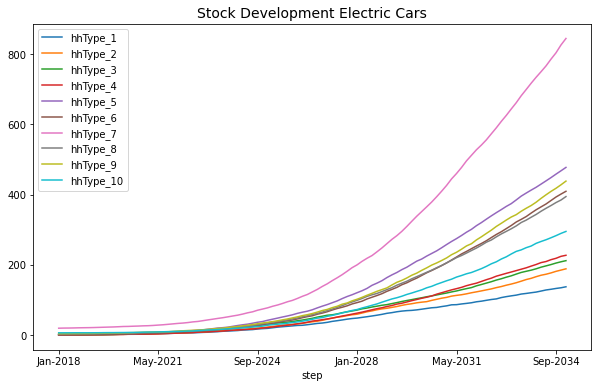

In [35]:
plt.figure()
tDf=trans_df(sel_df)
fig = tDf.plot(figsize=(10,6), title = "Stock Development Electric Cars")
fig.axes.title.set_size(14)

## Average

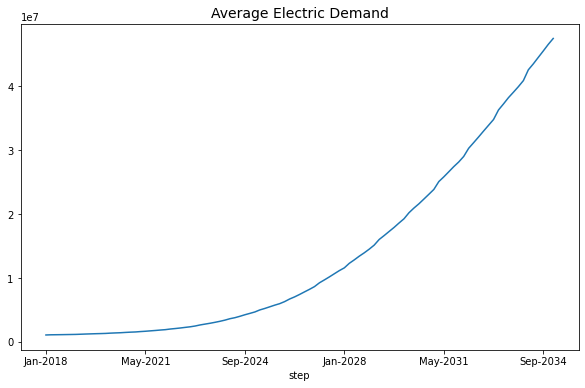

In [36]:
plt.figure()
t = test_df.mean(axis=1)
fig = t.plot(figsize=(10,6), title = "Average Electric Demand")
fig.axes.title.set_size(14)

In [ ]:
scom_df = sc1_df[(sc1_df['varName']=="stock_C")].drop("hhID", axis=1).set_index(["step"])
sel_df = sc1_df[(sc1_df['varName']=="stock_E")].drop("hhID", axis=1).set_index(["step"])